This code is to give the most important features we got from the text analysis. Here the customers will be able to know what was really good and bad about the restaurant.

We have used different references for this code here are the below


https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
https://medium.com/@zhiwei_zhang/final-blog-642fb9c7e781
https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e
https://www.geeksforgeeks.org/graph-plotting-python-set-1/


In [3]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer


from sklearn.svm import LinearSVC 
from sklearn.feature_extraction.text import TfidfVectorizer

Setting Up the data into different tables

In [4]:
#Getting csv data that was the output from our SVM code
df1=pd.read_csv('SVM_OutputResults.csv')

print (df1.head(10))

df1.shape[0]


                  user_id             business_id  Stars  \
0  iGtInQDTZ89mKnkhFWdlfA  HMSDOjt_KCyknzjQ9aI5Jw    1.0   
1  O3cItff0mKAfXtl5VmbW2w  yXiDD18UV49-7UhA6dWjAw    4.0   
2  U5YQX_vMl_xQy8EQDqlNQQ  VSNUFYBQ_wOFmRXZ8SeQ4w    4.0   
3  JrgMipJRhagq42ROTzC_CQ  lVVJMvqu4LXL5rBqjO6eqg    4.0   
4  8lofUN7rFkwT2bw4b5SM4g  EEIz44ewHhOKmfTloAK13g    5.0   
5  EdDmKiz6V89g6Dws9I4AKA  Huo1lJmVkdqvFuLtA74Nhw    3.0   
6  hxG4HPCLce9wbt5FAi4IHw  rntKF4Dm9JIJoSNi5XqRsQ    4.0   
7  I_hZOak13ydnfXV1nJPDTg  jDQIKfsfJU3M8M6n0ESKFg    2.0   
8  7M1zIE6OzpySDlqLU6MnEg  qfr7bHu1-VXUTQWXoSMf9g    2.0   
9  bW6VMyB5r05Yze44Ora0pA  iCQpiavjjPzJ5_3gPD5Ebg    5.0   

                                              Review Good(1)/Bad(0)  
0  I would like to start with the classic line "I...            Bad  
1  We come here for once at least once a month. I...           Good  
2  First meal in Pittsburgh was courtesy of S&D! ...           Good  
3  The Pork bone soup is delicious! The broth loo...       

1078332

In [5]:
df2= pd.read_csv('yelp_restaurant_train.csv')

print(df2.head(10))
#taking our orignal data



              business_id                 date               review_id  \
0  HMSDOjt_KCyknzjQ9aI5Jw  2018-11-04 23:44:27  0HWPTEnVT7L5BCKj33erLQ   
1  yXiDD18UV49-7UhA6dWjAw  2018-09-07 20:41:42  Y6xCQlzc9YTXD3IKMGN-oQ   
2  VSNUFYBQ_wOFmRXZ8SeQ4w  2015-09-30 02:07:55  9j_uLXkEgpN52Lz5VJ8sMQ   
3  lVVJMvqu4LXL5rBqjO6eqg  2015-05-30 07:40:17  xilO0UqpI_EYJg0nzTBqzw   
4  EEIz44ewHhOKmfTloAK13g  2017-11-19 16:47:26  P5LDWTH6cxQK-_IWtvyOWw   
5  Huo1lJmVkdqvFuLtA74Nhw  2016-06-28 21:42:10  Jp2QuT-Y0Ms9yNa3Rxch8w   
6  rntKF4Dm9JIJoSNi5XqRsQ  2018-02-22 18:45:25  cSHx_MPeFhPSyV7Oo4QjlQ   
7  jDQIKfsfJU3M8M6n0ESKFg  2018-01-16 00:20:06  i2V-3CJ_a4AMoK5kpWxqVA   
8  qfr7bHu1-VXUTQWXoSMf9g  2011-07-12 14:02:51  gPWOw5SDDzlwVKQfBnF01g   
9  iCQpiavjjPzJ5_3gPD5Ebg  2014-11-05 03:24:39  4O0bln3RzKv4awQ5p6-p9w   

                                                text                 user_id  \
0  I would like to start with the classic line "I...  iGtInQDTZ89mKnkhFWdlfA   
1  We come here for once 

In [6]:
dff =df2['date']

df1['date'] = dff
#adding date field to data

In [7]:
df1.head(5)

,user_id,business_id,Stars,Review,Good(1)/Bad(0),date
0,iGtInQDTZ89mKnkhFWdlfA,HMSDOjt_KCyknzjQ9aI5Jw,1.0,"I would like to start with the classic line ""I...",Bad,2018-11-04 23:44:27
1,O3cItff0mKAfXtl5VmbW2w,yXiDD18UV49-7UhA6dWjAw,4.0,We come here for once at least once a month. I...,Good,2018-09-07 20:41:42
2,U5YQX_vMl_xQy8EQDqlNQQ,VSNUFYBQ_wOFmRXZ8SeQ4w,4.0,First meal in Pittsburgh was courtesy of S&D! ...,Good,2015-09-30 02:07:55
3,JrgMipJRhagq42ROTzC_CQ,lVVJMvqu4LXL5rBqjO6eqg,4.0,The Pork bone soup is delicious! The broth loo...,Good,2015-05-30 07:40:17
4,8lofUN7rFkwT2bw4b5SM4g,EEIz44ewHhOKmfTloAK13g,5.0,Words cannot express how delectably divine a d...,Good,2017-11-19 16:47:26


In [8]:
import pandas
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import model_selection
import sklearn



train, test = sklearn.model_selection.train_test_split(df1, train_size = 0.8)

C:\Users\rashm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
train.head(5)

,user_id,business_id,Stars,Review,Good(1)/Bad(0),date
1069640,2AR4uS_k3x-oZSD-Z8utpg,-jKBFjNTbiafSdunQy6dlQ,1.0,The food and service is horrible. They say us ...,Bad,2015-12-16 23:57:00
638907,gOYgSEbE-Z7cqGsgGW3LBg,LHyj66waFlDcw9UToo27JQ,3.0,"Downgrading my rating unfortunately, we had a ...",Good,2018-01-18 03:42:41
137474,uHZr3XbjKvRTwdXLXrFuvg,Kal1hFMTEzdXYpa5MNzUPw,3.0,I start my February food-free challenge with t...,Good,2012-02-01 05:48:27
832597,qRWeK6Bpo9wiGt9v7cHiCA,q18xbq3Cbyp_BJyfMQxFxg,3.0,Its definitely somewhere that every tourist mu...,Good,2016-01-26 18:48:37
961168,e1dYw-1Km6IAwXlOLIMAeg,zpSjMqahUSt39dYD-oqFPg,4.0,I don't think I've ever given a drugstore a ra...,Good,2016-08-07 20:15:08


In [10]:
test.drop(["Good(1)/Bad(0)"], axis = 1, inplace = True)

test.head(5)

C:\Users\rashm\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,business_id,Stars,Review,date
797893,rTpsaH0Hz7XW92_tES1B2Q,cbgIpJwmPVI6Zf7nUIXdFw,5.0,I just happened to find this place when I need...,2017-08-10 04:59:29
896367,TEHiUF-e8pa37rByg15MmA,Cu5icjH_psCatgvN4fU1-A,1.0,"Maybe it was the oppressive heat, maybe the di...",2009-07-22 03:54:25
712472,3i8VO5_mher30m0OcdqD9g,YV9GVfmDSDM7HSV0jVdTOA,4.0,You can never go wrong with El Pollo Loco. The...,2015-02-12 21:38:28
1033907,JmMXYQJio5eXgOvVZl_xGw,kxo3Zz_JIEUGkJHl9kUiKg,3.0,3 outs of 5! Overpriced and overhyped burgers!...,2013-01-19 22:19:52
1026054,qCAp_3XHWYqkeX_iQny0iA,ChcUwAGAVoLXMsfI4vJ3DA,5.0,"Friendly and quick service, as well as good fo...",2018-04-10 01:39:26


In [11]:
master=train # labelled good or bad
subsettable = test      # without label

In [12]:
master.head(45)

,user_id,business_id,Stars,Review,Good(1)/Bad(0),date
1069640,2AR4uS_k3x-oZSD-Z8utpg,-jKBFjNTbiafSdunQy6dlQ,1.0,The food and service is horrible. They say us ...,Bad,2015-12-16 23:57:00
638907,gOYgSEbE-Z7cqGsgGW3LBg,LHyj66waFlDcw9UToo27JQ,3.0,"Downgrading my rating unfortunately, we had a ...",Good,2018-01-18 03:42:41
137474,uHZr3XbjKvRTwdXLXrFuvg,Kal1hFMTEzdXYpa5MNzUPw,3.0,I start my February food-free challenge with t...,Good,2012-02-01 05:48:27
832597,qRWeK6Bpo9wiGt9v7cHiCA,q18xbq3Cbyp_BJyfMQxFxg,3.0,Its definitely somewhere that every tourist mu...,Good,2016-01-26 18:48:37
961168,e1dYw-1Km6IAwXlOLIMAeg,zpSjMqahUSt39dYD-oqFPg,4.0,I don't think I've ever given a drugstore a ra...,Good,2016-08-07 20:15:08
931122,PcvbBOCOcs6_suRDH7TSTg,fNtapHp1BDs3JpkcTWtaSQ,3.0,Great products if you're looking for cooking h...,Good,2016-10-15 16:21:43
654915,pb5gli5Je43ePtjv3mhZVA,AercPW1B2YVNK3UsiPDkTg,5.0,I went to this place without knowing much abou...,Good,2012-02-06 08:43:55
720630,p9tR34bGpGCvZwMSnA7qug,K-VnzifnBPqWjR_yRHSUdg,1.0,I drive ten miles to CNET to this Walmart beca...,Bad,2017-10-21 16:50:59
773283,N2_0dfYCO2hXMKIr2e52CA,8I2XBrjf4rOEWx7pnKpVeg,3.0,"This Thai restaurant is clean, very modern, an...",Good,2017-09-01 02:01:22
784198,_0bpfpVYYbnqN_NBJNXudQ,6t7mlTVjDA9fhuFAZmVzAQ,4.0,I like Portillo's. My hubby likes Portillo's. ...,Good,2015-05-25 06:25:39


In [13]:
subsettable.head(5)

,user_id,business_id,Stars,Review,date
797893,rTpsaH0Hz7XW92_tES1B2Q,cbgIpJwmPVI6Zf7nUIXdFw,5.0,I just happened to find this place when I need...,2017-08-10 04:59:29
896367,TEHiUF-e8pa37rByg15MmA,Cu5icjH_psCatgvN4fU1-A,1.0,"Maybe it was the oppressive heat, maybe the di...",2009-07-22 03:54:25
712472,3i8VO5_mher30m0OcdqD9g,YV9GVfmDSDM7HSV0jVdTOA,4.0,You can never go wrong with El Pollo Loco. The...,2015-02-12 21:38:28
1033907,JmMXYQJio5eXgOvVZl_xGw,kxo3Zz_JIEUGkJHl9kUiKg,3.0,3 outs of 5! Overpriced and overhyped burgers!...,2013-01-19 22:19:52
1026054,qCAp_3XHWYqkeX_iQny0iA,ChcUwAGAVoLXMsfI4vJ3DA,5.0,"Friendly and quick service, as well as good fo...",2018-04-10 01:39:26


Extraction of features from the text fields begin here.

In [14]:
feature = SnowballStemmer('english')
extractword = WordNetLemmatizer()

In [15]:
def dataprocess(data):

    for i in range(len(data)):
        line = data[i]
        #intializing the data in form of lines
        line = line.lower() 
        # converting all data into lower case letters
        translation = str.maketrans("","", string.punctuation);
        
        line = line.translate(translation)
        split = word_tokenize(line)
        # extracting most important features from the text data
        
         
        filtered = []
        # stores the processed sentences for procession
        for token in split:
            if re.search('[a-zA-Z]', token): 
                #Checking if all that is stored is alphabetical or not
                filtered.append(token)
        word = [i for i in filtered if i not in stopwords.words('english')]
        #all our stop wors in english should be removed and filtered out
        
        d = [feature.stem(word) for word in word] 
        #we get the text features
        d = [extractword.lemmatize(word) for word in d]
        #store it in 
        data[i] = d
        #d has all our feature texts
    return data

In [16]:
def cloud(business_id):
    #we are taking the data for a apecific business id or a firm. 
    train  = master[master['business_id'] == business_id][master['Good(1)/Bad(0)'] == 'Good']
    # we are taking all the review text of the business 
    text =  list(train['Review'])    
    
    #we run our prior created feature extraction method on it
    text = dataprocess(text)
    # we concatinate all the text available
    text = sum(text,[])
    
    #we take most common words by counting the frequency
    mostcommon = Counter(text)
    
    
    #these features are for how the word cloud will look like 
    wordcloud = WordCloud(    
                          width=480, height=480, margin=0
                          ).fit_words(mostcommon)
    fig = plt.figure(1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [17]:
import nltk
nltk.download('wordnet')

#downloaded nltk wordnet for display

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

C:\Users\rashm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


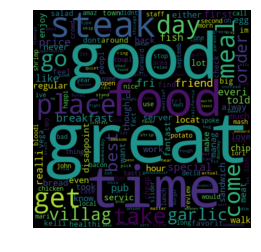

In [18]:
cloud('LlCbRAZfVkyqL21yKSyd4w')
#view the cloud

In [19]:

#We defined our rating value so that we can understand if a review is a good one or a bad one
# above three is good
# and below that is bad for this case assumption 
# below is the method for that

def labeldef(x):
    for i in range(len(x)):
        if x[i] >= 3.0:    
            x[i] = 1
        else:             
            x[i] = 0
    return x

In [29]:
# this will plot a histogram that will give us the overview of what were the 
#most commonly used words for a good review on a speific resturant
# it will be plotted in form of a histogram with ranges.

def plothist(business_id):
    
    train  = master[master['business_id'] == business_id]
    train_data =  list(train['Review'])    
    label = list(train['Stars'])          
    training = labeldef(label)
    
    a = TfidfVectorizer(stop_words ='english', ngram_range=(2,2))  
    b = a.fit(train['Review'])
    c = b.transform(train['Review'])

    clf = LinearSVC()
    clf.fit(c,training)
    
    co = clf.coef_.ravel()
    good = np.argsort(co )[-10:]
    bad = np.argsort(co )[:10]
    include = np.hstack([good, bad])
    
    plt.figure(figsize=(7, 4))
    colors = ['red' if i < 0 else 'blue' for i in co[include]]
    plt.bar(np.arange(2 * 10), co[include], color=colors)
    fextra = np.array(b.get_feature_names())
    
   
    plt.title('Good             Bad', fontsize = 20)
    plt.xticks(np.arange( 0, 2 * 10), fextra[include], rotation=40, ha='right')
    plt.show()

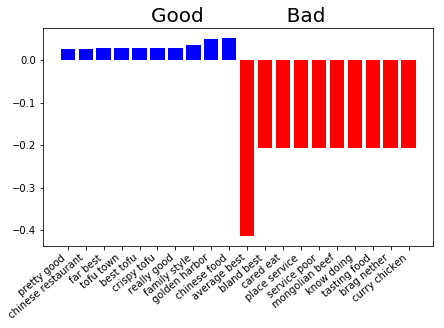

In [30]:
plothist('t_yiQnxUDdPPCN2z4QyezA')